# **Постановка задачи**

**Введение**

Задача заключается в разработке нейронной сети для классификации методик лечения третьей стадии рака легких на основе результатов обследований. Сеть должна предсказывать как метод лечения, так и уверенность доктора в диагнозе и выбранной методике лечения.

Разработка нейронной сети для классификации методик лечения третьей стадии рака легких должна удовлетворять указанным требованиям и обеспечивать точные и надежные результаты классификации и уверенности доктора.

**Требования к модели**



*   Разработка многоклассовой нейронной сети для классификации методик лечения на основе параметров обследования.
*   Возможность предсказывать не только класс методики лечения, но и уровень уверенности доктора в диагнозе и выбранной методике лечения.
*   Принятие на вход результатов обследования и возвращение вероятности принадлежности к каждому классу методики лечения и уверенность доктора.


**Данные**

*   Имеется таблица обследованиями третьей стадии рака легких и вариантами лечения.
*   Для каждого обследования представлены параметры, такие как биомаркеры, клинические данные и результаты тестов.

**Функциональность модели**

Модель должна принимать на вход параметры обследования и возвращать:

*   Вектор вероятностей принадлежности к каждому классу методики лечения.
*   Значение уверенности доктора в диагнозе и выбранной методике лечения.


**Обучение и оценка**

   - Разделить данные на обучающую, валидационную и тестовую выборки.
   - Выбрать функцию потерь для классификации и уверенности, например, категориальную перекрестную энтропию (Categorical Cross-Entropy) и среднеквадратичную ошибку (MSE) соответственно.
   - Выбрать оптимизатор для обучения, например, Adam.
   - Обучить модель на обучающей выборке и настроить гипер параметры с использованием валидационной выборки.
   - Оценить производительность модели на тестовой выборке с помощью метрик классификации и рассчитать уровень уверенности.


**Интерфейс и использование**

   - Разработать интерфейс для ввода результатов обследования.
   - Реализовать функции, которые будут принимать введенные данные, подавать их на вход модели и возвращать предсказанный класс методики лечения и уровень уверенности.

**Требования к реализации**

   - Предоставить исходный код модели, обучающий код.
   - Помочь с интеграцией модели на сайт заказчика.(проконсультировать разработчика сайта по работе нашей модели)

# **Непосредственно просмотр датасета**

In [ ]:
# импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# получение csv-файла
google_url = 'https://docs.google.com/spreadsheets/d/1Rmw4nLN7cxRnhFFrIETh3gx8Gxcv56hV/edit#gid=548315443'
new_google_url = google_url.replace('edit#gid', 'export?format=csv&gid')
df=pd.read_csv(new_google_url)
df.head()

,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
3,4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
4,5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...


In [ ]:
# процентный список пропущенных значений
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id_ответа - 0%
Раса - 0%
Пол - 0%
Возраст - 0%
Статус курения - 0%
ECOG - 0%
Есть опухолевая нагрузка? (симптомная опухоль) - 0%
Ко-мутации KRAS - 0%
Ко-мутации p53. - 0%
Ко-мутации STK11 - 0%
Ко-мутации KEAP1 - 0%
Срок от окончания ХЛТ - 0%
Молекулярный статус (только для неплоскоклеточного рака) - 0%
PD-L1 статус - 0%
Предпочтение пациента по ответу на терапию - 0%
Ответ эксперта (Лактионов) - 0%
Поставьте галочку, если уверены на 100% - 0%
Если 75% - 0%
Если 50% - 0%
Альтернатива, если 50% - обязательно - 0%
Комментарий - 0%


In [ ]:
# информация о колонках
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248832 entries, 0 to 248831
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   id_ответа                                                 248832 non-null  int64 
 1   Раса                                                      248832 non-null  object
 2   Пол                                                       248832 non-null  object
 3   Возраст                                                   248832 non-null  object
 4   Статус курения                                            248832 non-null  object
 5   ECOG                                                      248832 non-null  object
 6   Есть опухолевая нагрузка? (симптомная опухоль)            248832 non-null  object
 7   Ко-мутации KRAS                                           248832 non-null  object
 8   Ко-мутации p53

**Медицинские термины**                                   
*   **ECOG** - шкала оценки общего состояния онкологического больного. Методика предназначена для определения общего статуса онкологического больного в баллах от 0 (нормальная активность) до 4 (больной не в состоянии обслуживать себя, прикован к постели).
*   **Опухолевая нагрузка** - общее количество соматических мутаций в определенной области генома опухоли.
*   **Ко-мутации KRAS** - онкоген, мутации которого обладают потенциалом для перерождения нормальных клеток в злокачественные (в обычном состоянии белок отвечает за образование новых клеток, в мутированном он скоряет размножение злокачественных).
*   **Ко-мутации p53** - отвечает за регуляцию клеточного цикла (помогает клеткам восстанавливаться после повреждений и предотвращать неправильное деление клеток). Во время мутации он также влечет к неудержимому размножению клеток и развитию рака.
*   **Ко-мутации STK11** - регулирует сигнальные пути, связанные с энергетическим балансом клетки, помогает предотвращать развитие рака путем контроля метаболизма и ремонта ДНК в клетке.
*   **Ко-мутации KEAP1** - белок, который защищает клетки от окислительного стресса и регулирует уровень антиоксидантов. Во время мутации ген перестает реагировать на окислительные процессы.
*   **Химиолучевая терапия** - двухкомпонентный метод лечения злокачественный новообразований, при котором в разных комбинациях применяется воздействие ионизирующего излучения и химиотерапевтических препаратов.
*   **EGFR** - белок-рецептор, который находится на поверхности клетки и обеспечивает её "чувствительность" к определенным молекулярным сигналам. ex19, ex21 - указывает на мутацию в конкретной части гена.

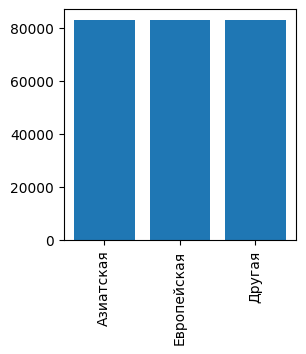

In [ ]:
# Распределение по расе
plt.figure(figsize=(3,3))
plt.bar(list(df['Раса'].value_counts().index), df['Раса'].value_counts())
plt.xticks(rotation=90)
plt.show()

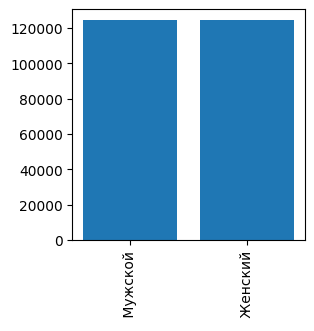

In [ ]:
# Распределение по полу
plt.figure(figsize=(3,3))
plt.bar(list(df['Пол'].value_counts().index), df['Пол'].value_counts())
plt.xticks(rotation=90)
plt.show()

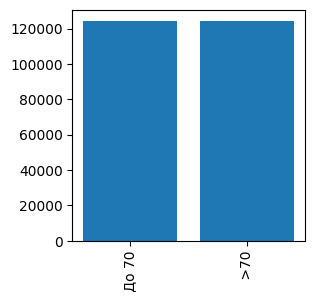

In [ ]:
# Распределение по возрасту
plt.figure(figsize=(3,3))
plt.bar(list(df['Возраст'].value_counts().index), df['Возраст'].value_counts())
plt.xticks(rotation=90)
plt.show()

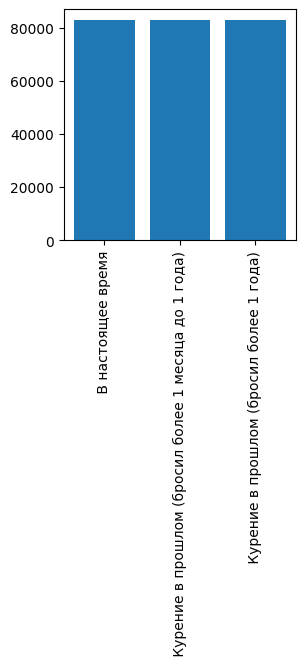

In [ ]:
# Распределение по статусу курения
plt.figure(figsize=(3,3))
plt.bar(list(df['Статус курения'].value_counts().index), df['Статус курения'].value_counts())
plt.xticks(rotation=90)
plt.show()

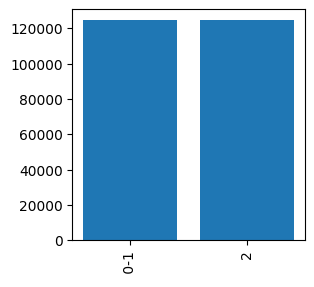

In [ ]:
# Распределение по ECOG
plt.figure(figsize=(3,3))
plt.bar(list(df['ECOG'].value_counts().index), df['ECOG'].value_counts())
plt.xticks(rotation=90)
plt.show()

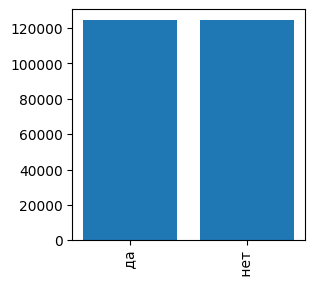

In [ ]:
# Распределение по опухолевой нагрузке
plt.figure(figsize=(3,3))
plt.bar(list(df['Есть опухолевая нагрузка? (симптомная опухоль)'].value_counts().index), df['Есть опухолевая нагрузка? (симптомная опухоль)'].value_counts())
plt.xticks(rotation=90)
plt.show()

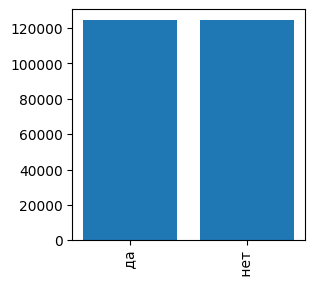

In [ ]:
# Распределение по KRAS
plt.figure(figsize=(3,3))
plt.bar(list(df['Ко-мутации KRAS'].value_counts().index), df['Ко-мутации KRAS'].value_counts())
plt.xticks(rotation=90)
plt.show()

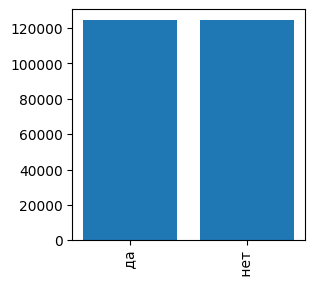

In [ ]:
# Распределение по p53
plt.figure(figsize=(3,3))
plt.bar(list(df['Ко-мутации p53.'].value_counts().index), df['Ко-мутации p53.'].value_counts())
plt.xticks(rotation=90)
plt.show()

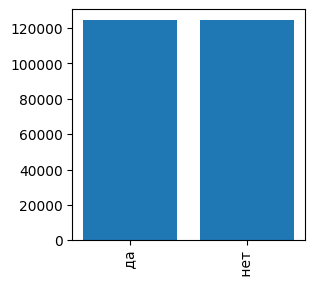

In [ ]:
# Распределение по STK11
plt.figure(figsize=(3,3))
plt.bar(list(df['Ко-мутации STK11'].value_counts().index), df['Ко-мутации STK11'].value_counts())
plt.xticks(rotation=90)
plt.show()

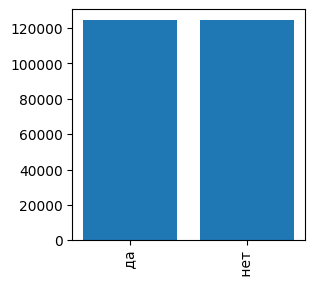

In [ ]:
# Распределение по KEAP1
plt.figure(figsize=(3,3))
plt.bar(list(df['Ко-мутации KEAP1'].value_counts().index), df['Ко-мутации KEAP1'].value_counts())
plt.xticks(rotation=90)
plt.show()

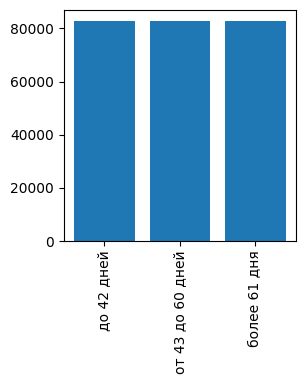

In [ ]:
# Распределение по сроку окончания ХЛТ
plt.figure(figsize=(3,3))
plt.bar(list(df['Срок от окончания ХЛТ'].value_counts().index), df['Срок от окончания ХЛТ'].value_counts())
plt.xticks(rotation=90)
plt.show()

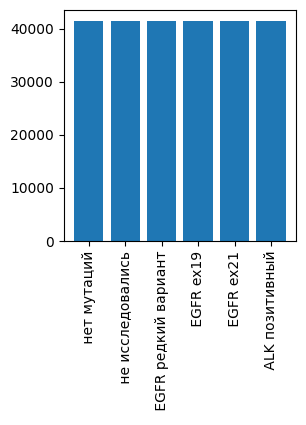

In [ ]:
# Распределение по молекулярному статусу
plt.figure(figsize=(3,3))
plt.bar(list(df['Молекулярный статус (только для неплоскоклеточного рака)'].value_counts().index), df['Молекулярный статус (только для неплоскоклеточного рака)'].value_counts())
plt.xticks(rotation=90)
plt.show()

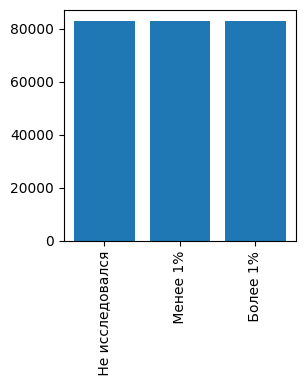

In [ ]:
# Распределение по PD-L1 статусу
plt.figure(figsize=(3,3))
plt.bar(list(df['PD-L1 статус'].value_counts().index), df['PD-L1 статус'].value_counts())
plt.xticks(rotation=90)
plt.show()

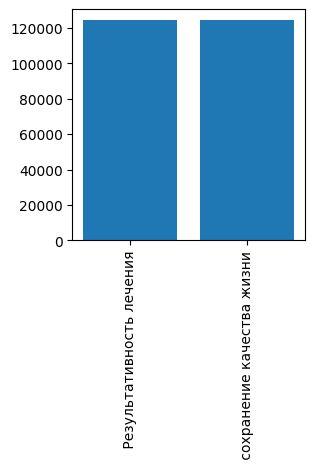

In [ ]:
# Распределение по предпочтению пациента по ответу на терапию
plt.figure(figsize=(3,3))
plt.bar(list(df['Предпочтение пациента по ответу на терапию'].value_counts().index), df['Предпочтение пациента по ответу на терапию'].value_counts())
plt.xticks(rotation=90)
plt.show()

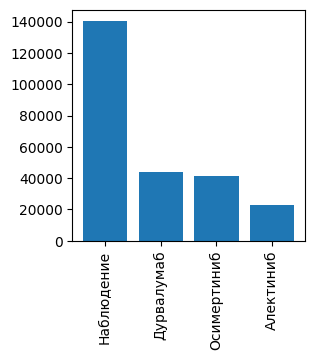

In [ ]:
# Распределение по ответу эксперта
plt.figure(figsize=(3,3))
plt.bar(list(df['Ответ эксперта (Лактионов)'].value_counts().index), df['Ответ эксперта (Лактионов)'].value_counts())
plt.xticks(rotation=90)
plt.show()

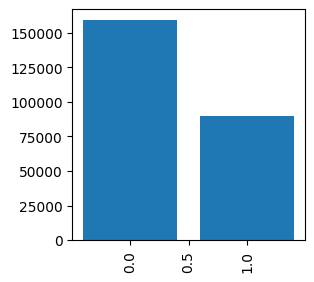

In [ ]:
# Распределение по уверенности на 100%
plt.figure(figsize=(3,3))
plt.bar(list(df['Поставьте галочку, если уверены на 100%'].value_counts().index), df['Поставьте галочку, если уверены на 100%'].value_counts())
plt.xticks(rotation=90)
plt.show()

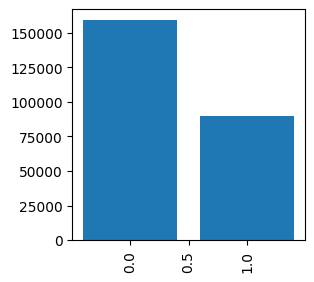

In [ ]:
# Распределение по уверенности на 75%
plt.figure(figsize=(3,3))
plt.bar(list(df['Если 75%'].value_counts().index), df['Если 75%'].value_counts())
plt.xticks(rotation=90)
plt.show()

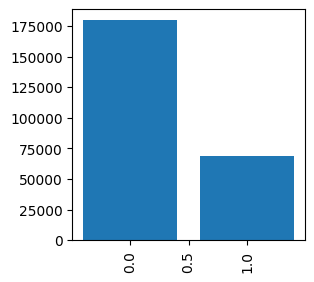

In [ ]:
# Распределение по уверенности на 50%
plt.figure(figsize=(3,3))
plt.bar(list(df['Если 50%'].value_counts().index), df['Если 50%'].value_counts())
plt.xticks(rotation=90)
plt.show()

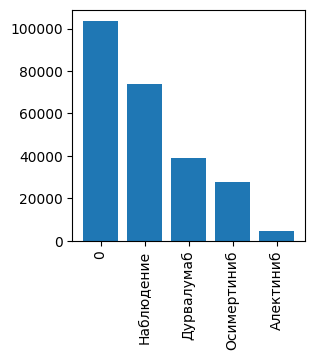

In [ ]:
# Распределение по альтернативам
plt.figure(figsize=(3,3))
plt.bar(list(df['Альтернатива, если 50% - обязательно'].value_counts().index), df['Альтернатива, если 50% - обязательно'].value_counts())
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Вывод уникальных комментариев
unique_comments = df['Комментарий'].unique()
for comment in unique_comments:
    print(comment)

0
Нет доказательной базы для назначения после перерыва >61 дня после ХЛТ
Возможно есть мутации и эффективность Дурвалумаба будет низкой
Возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы
Возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы, эффективность Осимертиниба ниже при 21 экзоне
Возможна низкая эффективность Дурвалумаба, Алектиниб без доказательной базы
Возможна низкая эффективность Дурвалумаба при PD-1 < 1%
Возможна низкая эффективность Дурвалумаба при PD-1 < 1%, возможно есть активирующие мутации
Вероятность 45% PD-L1 < 1% с потенциально низкой эффективностью Дурвалумаба
Возможно есть мутации и эффективность Дурвалумаба будет низкой
, Вероятность 45% PD-L1 < 1% с потенциально низкой эффективностью Дурвалумаба
Возможно есть мутации и эффективность Дурвалумаба будет низкой
, Возможна низкая эффективность Дурвалумаба при PD-1 < 1%


In [ ]:
# Подсчет количества комментариев каждого вида
unique_comments = df['Комментарий'].value_counts().reset_index()
unique_comments.columns = ['Комментарий', 'Количество']
print(unique_comments)

                                          Комментарий  Количество
0                                                   0       62208
1   Возможна низкая эффективность Дурвалумаба, Оси...       59904
2   Возможна низкая эффективность Дурвалумаба, Оси...       34560
3   Возможна низкая эффективность Дурвалумаба, Але...       27648
4   Нет доказательной базы для назначения после пе...       23040
5   Возможно есть мутации и эффективность Дурвалум...       11520
6   Возможна низкая эффективность Дурвалумаба при ...        9216
7   Вероятность 45% PD-L1 < 1% с потенциально низк...        6912
8   Возможна низкая эффективность Дурвалумаба при ...        4608
9   Возможно есть мутации и эффективность Дурвалум...        4608
10  Возможно есть мутации и эффективность Дурвалум...        4608


# **Выводы**

*   Датасет представляет собой csv-файл с 248 832 строчками, где отсутствуют пропущенные значения (Null).
*   Изначально в датасете содержится 20 столбцов с типами данных int64, object, bool.
*   Значения признаков распределены равномерно, выбросы отсутствуют. Помино перевода категориальных переменных через LabelEncoding предобработка не понадобится.
*   Чаще остальных методов лечения рекомендуют наблюдение, остальные признаки (пол, возратст и т.д.) распределились почти поровну.
*   Необходимо будет объединить столбцы уверенности 100%, 75% и 50% в один для удобства и дальнейшей работы.